# Import Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import importlib
import simulation_helper
import pandas as pd

importlib.reload(simulation_helper)
from simulation_helper import get_fire_data, fit_fire_size_distribution, fit_cox_process,\
    generate_samples, generate_fire_area

In [ ]:

intensive, extensive = get_fire_data(greater_than_100=True)

# Extensive Zone

In [108]:
# get parameters for fire size distribution
fire_size_params = fit_fire_size_distribution(extensive['SIZE_HA'])

# get the number of fires each year
fire_counts = extensive.groupby('YEAR').size()

# get parameters for the Cox process
cox_params = fit_cox_process(fire_counts)

# generate samples
simulated_number_fires = generate_samples(cox_params, size=10000)

# apply generate_fire_area to the simulated number of fires
gamma_cox_simulated_fires = [generate_fire_area(x, fire_size_params) for x in simulated_number_fires['gamma']]




In [109]:

# Convert list of dicts to DataFrame
gamma_cox_simulated_fires_df = pd.DataFrame(gamma_cox_simulated_fires)

# Now you can view or analyze the DataFrame
gamma_cox_simulated_fires_df.head()

# truncate all values to 1000000
gamma_cox_simulated_fires_df = gamma_cox_simulated_fires_df.clip(upper=1000000)

# Melt the DataFrame to long format
long_df = gamma_cox_simulated_fires_df.melt(var_name='distribution', value_name='total_area')


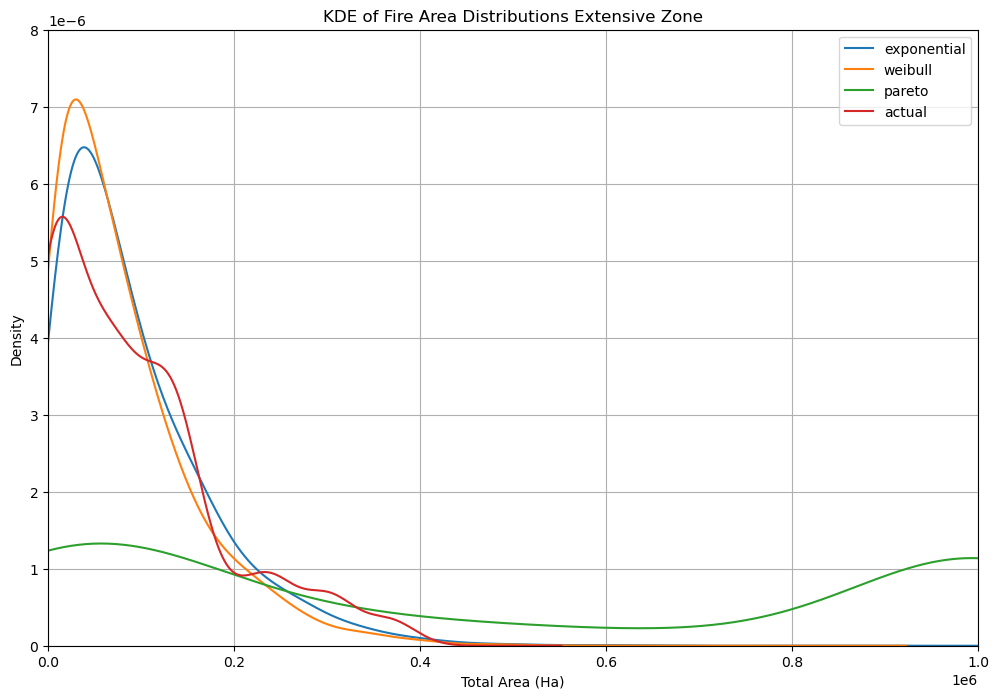

In [110]:
#group extensive by year and sum the total SIZE_HA

extensive_grouped = extensive.groupby('YEAR')['SIZE_HA'].sum().reset_index()

# add to long df but remove the year and the disteibution is called 'actual'
extensive_grouped.rename(columns={'SIZE_HA': 'total_area'}, inplace=True)
extensive_grouped['distribution'] = 'actual'
# drop the YEAR column
extensive_grouped.drop(columns='YEAR', inplace=True)

# concatenate the two DataFrames
combined_df = pd.concat([long_df, extensive_grouped], ignore_index=True)

# plot kde of the three distributions
plt.figure(figsize=(12, 8))
for distribution in combined_df['distribution'].unique():
    subset = combined_df[combined_df['distribution'] == distribution]
    subset['total_area'].plot.kde(label=distribution, bw_method=0.3)

plt.title('KDE of Fire Area Distributions Extensive Zone')
plt.xlabel('Total Area (Ha)')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 1000000)
plt.ylim(0, 0.000008)
plt.grid()
plt.show()


# Intensive Zone

In [111]:
# get parameters for fire size distribution
fire_size_params = fit_fire_size_distribution(intensive['SIZE_HA'])

# get the number of fires each year
fire_counts = intensive.groupby('YEAR').size()

# get parameters for the Cox process
cox_params = fit_cox_process(fire_counts)

# generate samples
simulated_number_fires = generate_samples(cox_params, size=10000)

# apply generate_fire_area to the simulated number of fires
gamma_cox_simulated_fires = [generate_fire_area(x, fire_size_params) for x in simulated_number_fires['gamma']]

# Melt the DataFrame to long format
long_df = gamma_cox_simulated_fires_df.melt(var_name='distribution', value_name='total_area')


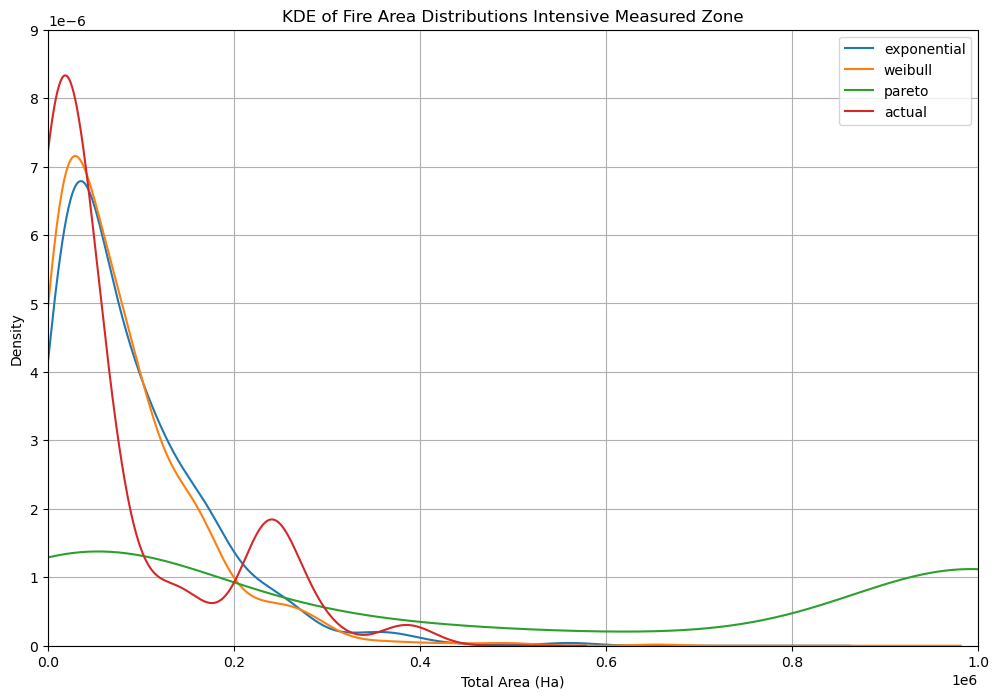

In [107]:
#group extensive by year and sum the total SIZE_HA

extensive_grouped = intensive.groupby('YEAR')['SIZE_HA'].sum().reset_index()

# add to long df but remove the year and the disteibution is called 'actual'
extensive_grouped.rename(columns={'SIZE_HA': 'total_area'}, inplace=True)
extensive_grouped['distribution'] = 'actual'
# drop the YEAR column
extensive_grouped.drop(columns='YEAR', inplace=True)

# concatenate the two DataFrames
combined_df = pd.concat([long_df, extensive_grouped], ignore_index=True)

# plot kde of the three distributions
plt.figure(figsize=(12, 8))
for distribution in combined_df['distribution'].unique():
    subset = combined_df[combined_df['distribution'] == distribution]
    subset['total_area'].plot.kde(label=distribution, bw_method=0.3)

plt.title('KDE of Fire Area Distributions Intensive Measured Zone')
plt.xlabel('Total Area (Ha)')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 1000000)
plt.ylim(0, 0.000009)
plt.grid()
plt.show()
